In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost

from functions import make_dataset

from functions import make_portfolio

from sklearn.utils import shuffle

import time

import pickle

In [16]:
import seaborn

In [2]:
results_df = pd.read_pickle("TrainingSecondDataset/results_df")

In [14]:
data = []
for i in range(9):
    if i == 4:
        continue
    data1 = []
    for j in range(9):
        if j == 4:
            continue
        
        data1.append(len(np.intersect1d(results_df.loc[2][i], results_df.loc[2][j])))
        
    data.append(data1)

<AxesSubplot:>

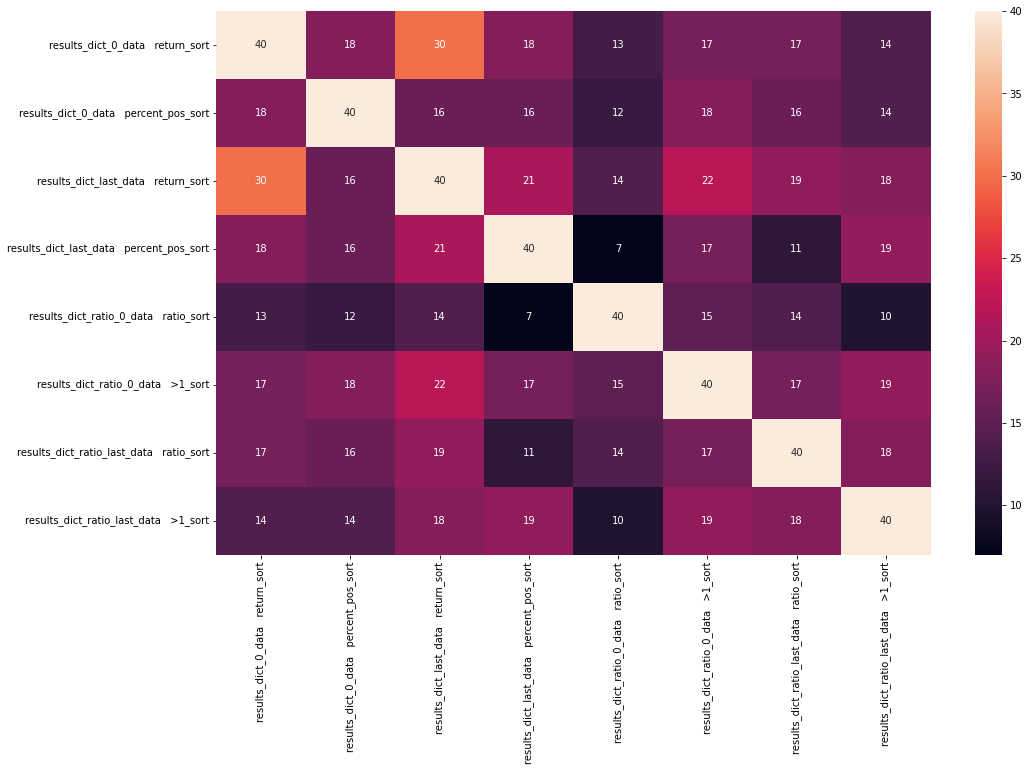

In [30]:
plt.figure(figsize = (16, 10))
seaborn.heatmap(data, annot = True, yticklabels=(results_df.loc[0].values + "   " +  results_df.loc[1].values ), xticklabels = (results_df.loc[0].values + "   " +  results_df.loc[1].values ))

In [ ]:
"""
lets go with results_dict_0_data return sort and results_dict_last_data return sort, seems to be a good candidate
"""

In [3]:
cols_to_choose_from = results_df.loc[2][[0,2]].values

In [4]:
cols = np.array([])
for i in cols_to_choose_from:
    cols = np.append(cols, i)

In [5]:
cols_to_choose_from = np.unique(cols)

In [6]:
del cols

In [7]:
len(cols_to_choose_from)

50

In [ ]:
"""
the overlap between them is only about 11 which is not much and which is good because we are getting diversity
"""

In [2]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [3]:
Datesog = np.append(np.append(Date1, Date2), Date3)

In [4]:
df = pd.read_pickle("CreatingSecondDataset/train_df")

In [5]:
df2 = pd.read_pickle("CreatingSecondDataset/train_df_2")

In [6]:
Dates = np.sort(np.unique(df.reset_index().set_index(["Date"]).index))

In [7]:
df = df.loc[Dates]

In [8]:
df = df.append(df2)

In [9]:
df

Close  ABAND_indicator_10  ABAND_indicator_20  \
Date       Ticker                                                  
2014-04-28 ISR      2.04           -0.330088           -0.433578   
           ALNY    48.87           -0.254625           -0.433430   
           PTE     16.59           -0.091001           -0.065728   
           RIOT    16.64           -0.126365           -0.211106   
           AVEO    12.40           -0.253859           -0.412510   
...                  ...                 ...                 ...   
2021-04-23 CFMS     0.94            0.309568            0.120624   
           FORD     2.70           -0.070832           -0.174680   
           PBF     12.91           -0.120766           -0.247027   
           CIDM     1.36            0.128709           -0.063587   
           ABTL     2.64           -0.052509           -0.129662   

                   ABAND_indicator_40  ABAND_signal_10  ABAND_signal_20  \
Date       Ticker                                                         
2014-04-28 ISR              -0.073089              0.0             -1.0   
           ALNY             -0.772110              0.0             -1.0   
           PTE              -0.327272              0.0              0.0   
           RIOT             -0.489782              0.0              0.0   
           AVEO             -0.788249              0.0             -1.0   
...                               ...              ...              ...   
2021-04-23 CFMS             -0.099883              0.0              0.0   
           FORD             -0.390832              0.0              0.0   
           PBF              -0.373323              0.0              0.0   
           CIDM             -0.039054              0.0              0.0   
           ABTL             -0.154267              0.0              0.0   

                   ABAND_signal_40  MFV_40_10_indicator_sign_change  \
Date       Ticker                                                     
2014-04-28 ISR                 0.0                              0.0   
           ALNY               -1.0                              0.0   
           PTE                 0.0                              0.0   
           RIOT               -1.0                              0.0   
           AVEO               -1.0                              0.0   
...                            ...                              ...   
2021-04-23 CFMS                0.0                              0.0   
           FORD                0.0                              0.0   
           PBF                 0.0                              0.0   
           CIDM                0.0                              0.0   
           ABTL                0.0                              0.0   

                   APO_10_20  APO_10_40  ...  return_40  Class_multi_40_20  \
Date       Ticker                        ...                                 
2014-04-28 ISR     -0.011892   0.111151  ...  45.588235                0.0   
           ALNY    -0.065416  -0.146319  ...  35.604665                0.0   
           PTE     -0.023115  -0.086733  ... -36.347197               19.0   
           RIOT    -0.038634  -0.082976  ...   9.134615                5.0   
           AVEO    -0.050611  -0.119489  ...  27.016129                1.0   
...                      ...        ...  ...        ...                ...   
2021-04-23 CFMS    -0.036105  -0.084893  ...  21.276596                1.0   
           FORD    -0.032399  -0.075637  ...   6.296296                5.0   
           PBF     -0.032066  -0.029163  ...  25.639040                1.0   
           CIDM    -0.032679  -0.056413  ...   0.735294                9.0   
           ABTL    -0.029094  -0.057471  ...   5.681818                6.0   

                   Class_binary_20_20  return_20  Class_binary_10_20  \
Date       Ticker                                                      
2014-04-28 ISR                    1.0  10.294118                 0.0   
   

In [10]:
Dates = np.sort(np.unique(df.reset_index().set_index(["Date"]).index))

In [11]:
Dates = np.unique(Dates)

In [12]:
df = df.loc[Dates]

In [13]:
del df2

In [21]:
def make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, pred_col, return_col, return_col_2):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, [return_col, return_col_2])])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_return_40 = X_test.pop(return_col)
    
    Class_multi_40_20_test = X_test.pop(return_col_2)
    
    return X_train, X_test, Y_train, Y_return_40, Class_multi_40_20_test

In [22]:
def return_40_metric(pred, labels, scale, labels_multi):
    
    a = labels.iloc[np.argsort(pred)[:int(len(pred) * (1 / (scale + 1)))]].values
    
    b = labels_multi.iloc[np.argsort(pred)[:int(len(pred) * (1 / (scale + 1)))]].values
    
    
    val = ((b== 0).sum() + (b == 1).sum() + (b == 2).sum() + (b == 3).sum()) / ((b== 19).sum() + (b == 18).sum() + (b == 17).sum() + (b == 16).sum())
    
    
    return np.mean(a), val

In [23]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval, scale, labels_multi):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        self.scale = scale
        self.labels_multi = labels_multi
        
    def after_iteration(self, model, epoch, evals_log):
        
        
        if epoch % 5 == 0 or epoch == 59:
            

            self.results_eval_mine.append(return_40_metric(model.predict(self.eval_mine), self.eval_return_40, self.scale, self.labels_multi))    
        

            
        return False

In [24]:
params1 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [87]:
(len(Dates) - 111) / 22

50.31818181818182

In [16]:
prediction_dates = np.linspace(90, len(Dates) - 25, 22).astype(int)

In [17]:
prediction_dates

array([  90,  142,  195,  247,  300,  352,  405,  457,  510,  562,  615,
        667,  720,  772,  825,  877,  930,  982, 1035, 1087, 1140, 1193])

In [30]:
training_periods = []
prediction_periods = []
for pred_date_indx in prediction_dates:
    
    prediction_period = Dates[pred_date_indx: pred_date_indx + 20]

    pred_date_indx_datesog = np.where(Datesog == prediction_period[0])[0][0]

    last_possible_train_date = Datesog[pred_date_indx_datesog - 41]

    training_period = Dates[Dates <= last_possible_train_date]
    
    training_periods.append(training_period)
    prediction_periods.append(prediction_period)
    
    

In [31]:
count = 0
start_time = time.perf_counter()
start_time_save = time.perf_counter()
results = []

while True:
    
    results1 = []
        
    count += 1
    
    t = time.localtime()
    
    current_time = time.strftime("%H:%M:%S", t)


    print(str(count) +"     "+ current_time)
    
    if count > 0 and time.perf_counter()  - start_time > 3600:
        
        print("sleeping")
        
        time.sleep(600)
        
        start_time = time.perf_counter()
        

    cols = np.random.choice(cols_to_choose_from, np.random.randint(7, 25), replace = "False")
    
    cols = np.unique(cols)
    
    for training_period, prediction_period in zip(training_periods, prediction_periods):
    
        results2 = []
    


        X_train, X_test, Y_train, Y_return_40, Class_multi_40_20_test = make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, "Class_binary_40_20", "return_40", "Class_multi_40_20")


        scale = int(np.sum(Y_train == 1) / np.sum(Y_train == 0))

        train_weights = Y_train.map({0:scale, 1:1})


        xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)

        xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)

        data = []

        mycallback = my_callback(xgtest, Y_return_40, data, scale, Class_multi_40_20_test)

        bst = xgboost.train(params1, xgtrain, num_boost_round = 60, verbose_eval = False, callbacks = [mycallback])


        results2.append(prediction_period[0])
        results2.append(cols)
        results2.append(len(X_train))
        results2.append(len(X_test))
        results2.append(data)

        results1.append(results2)
        
    results.append(results1)
        
        


    if time.perf_counter() - start_time_save > 300:

        with open("Training_second_dataset_col_search/col_search_results", "wb") as f:
            pickle.dump(results, f)

        start_time_save = time.perf_counter()

    







1     03:19:27
2     03:23:38
3     03:27:49
4     03:32:02
5     03:36:16
6     03:40:33
7     03:44:56
8     03:49:14
9     03:53:29
10     03:57:48
11     04:02:07
12     04:06:29
13     04:10:55
14     04:15:14
15     04:19:34
sleeping
16     04:34:08
17     04:38:46
18     04:43:12
19     04:47:32
20     04:51:55
21     04:56:13
22     05:00:38
23     05:05:04
24     05:09:25
25     05:13:46
26     05:18:06
27     05:22:23
28     05:26:51
29     05:31:13
sleeping
30     05:45:36
31     05:49:59
32     05:54:21
33     05:58:41
34     06:03:06
35     06:07:29
36     06:11:54
37     06:16:14
38     06:20:39
39     06:25:00
40     06:29:27
41     06:33:54
42     06:38:17
43     06:42:39
sleeping
44     06:57:00
45     07:01:18
46     07:05:38
47     07:09:59
48     07:14:23
49     07:18:42
50     07:23:05
51     07:27:29
52     07:31:51
53     07:36:10
54     07:40:27
55     07:44:47
56     07:49:05
57     07:53:28
sleeping
58     08:07:51
59     08:12:13
60     08:16:34
61     08:20:

KeyboardInterrupt: 

In [34]:
len(results[0])

22

In [18]:
with open("Training_second_dataset_col_search/col_search_results", "rb") as f:
    results = pickle.load(f)

In [21]:
len(results[0])

22

In [24]:
results[0][0]

['2014-10-03',
 array(['ADX_1_11', 'APO_10_40', 'Accounts & Notes Receivable/Revenue',
        'Accounts & Notes Receivable/Revenue_QC', 'Close',
        'Enterprise Value/EBITDA_QC',
        'Enterprise Value/Share Capital & Additional Paid-In Capital',
        'OBV_80', 'Operating Income (Loss)/Interest Expense, Net_QC',
        'Return on Assets_YC', 'Total Assets/Total Liabilities_YC',
        'close_0/Close_10', 'close_0/Close_40', 'close_160/Close_360',
        'close_40/Close_120'], dtype='<U62'),
 4355,
 1393,
 [(5.124329763886455, 0.8070175438596491),
  (3.470868467786862, 0.676923076923077),
  (4.548090582977514, 0.9166666666666666),
  (4.284070377744128, 0.873015873015873),
  (1.8602659654179896, 0.7205882352941176),
  (1.364802788319521, 0.7246376811594203),
  (1.828337749026809, 0.7611940298507462),
  (1.1513183064311272, 0.7246376811594203),
  (1.4978524519715235, 0.7794117647058824),
  (1.497852451971524, 0.7794117647058824),
  (1.8947503040370905, 0.7794117647058824),
 

In [42]:
"""
vs boosting rounds
"""
data = np.array([])
for i in results:
    for j in i:
        data = np.append(data,np.array(j[4])[:,1])
        


In [31]:
len(results[0][0][4])

13

In [43]:
data = np.reshape(data, (-1, 13))

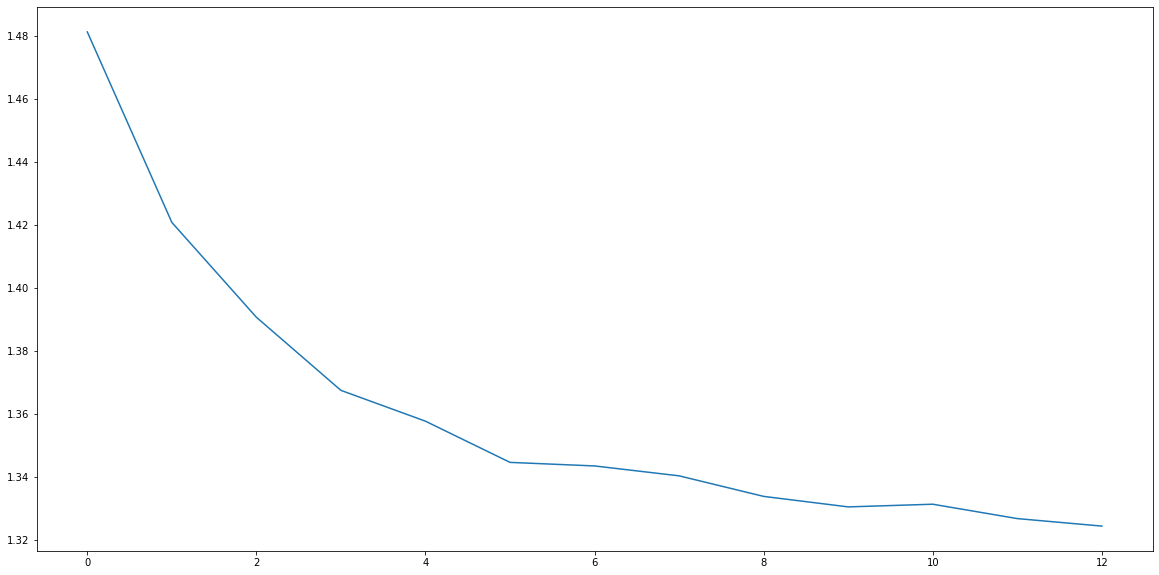

In [44]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(data, axis = 0))

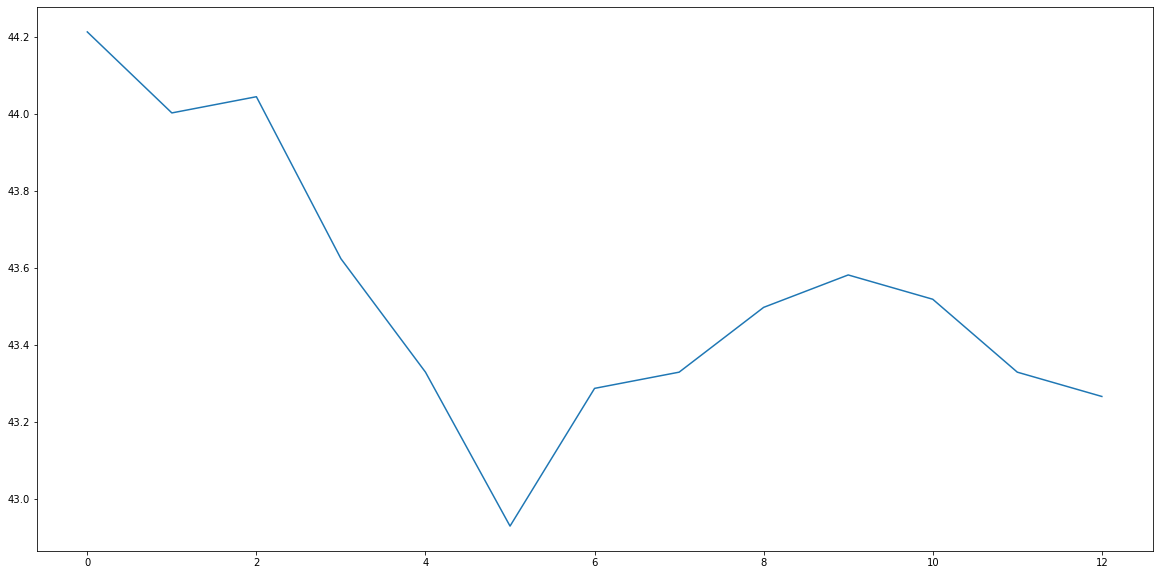

In [45]:
plt.figure(figsize = (20, 10))
plt.plot(np.sum(data > 1, axis = 0) / len(data[:,0]) * 100)

In [60]:
data = np.array([])
for i in results:
    for j in i:
        data = np.append(data,np.mean(np.array(j[4])[:,1]))

In [61]:
data = np.reshape(data, (-1, 22))


In [51]:
sp500 = pd.read_pickle("External_data/sp500")

In [56]:
pred_dates = np.array([])
for i in results[0]:
    pred_dates = np.append(pred_dates, i[0])

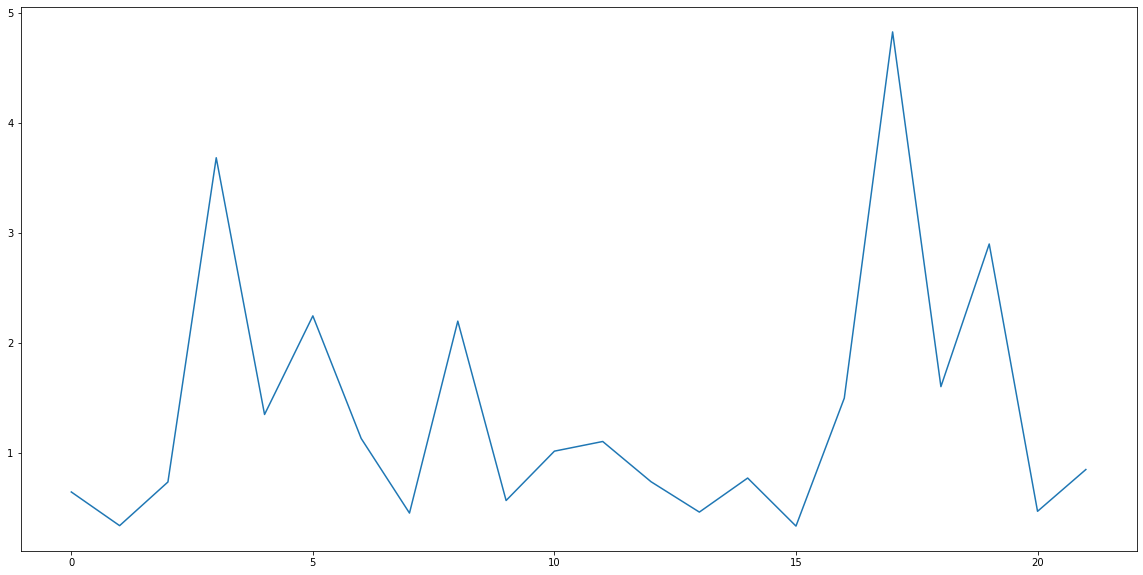

In [63]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(data, axis = 0))
#plt.plot(sp500.loc[pred_dates]["return_40"].values, "black")



In [90]:
data = np.array([])
for i in results:
    for j in i:
        data = np.append(data,(np.array(j[-1][-1][0])))

In [91]:
data = np.reshape(data, (-1, 22))

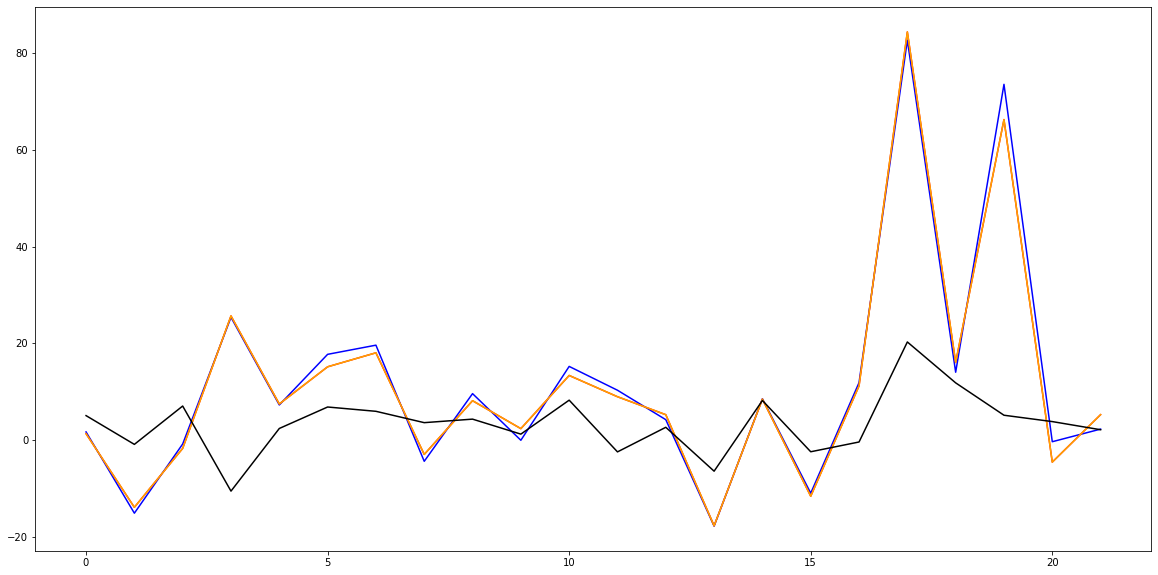

In [74]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(data0, axis = 0), "blue")
plt.plot(np.mean(data4, axis = 0), "red")
plt.plot(np.mean(data_last, axis = 0), "orange")

plt.plot(sp500.loc[pred_dates]["return_40"].values, "black")

In [79]:
len(data)

216

In [92]:
indx_last = np.argsort(np.mean(data, axis = 1))[::-1][:10]

In [85]:
np.mean(data[indx], axis = 0)

array([  2.37070881, -11.89972444,  -1.51443623,  29.96378435,
         8.90257066,  20.37979498,  23.81981527,   2.83095059,
        11.00859129,  -0.35954875,  18.61725841,  18.83940565,
         5.7076495 , -15.22844131,  17.7952279 ,  -8.57998385,
        19.22624008,  86.01869149,  20.70463478,  81.06840785,
         3.89852515,   7.46631236])

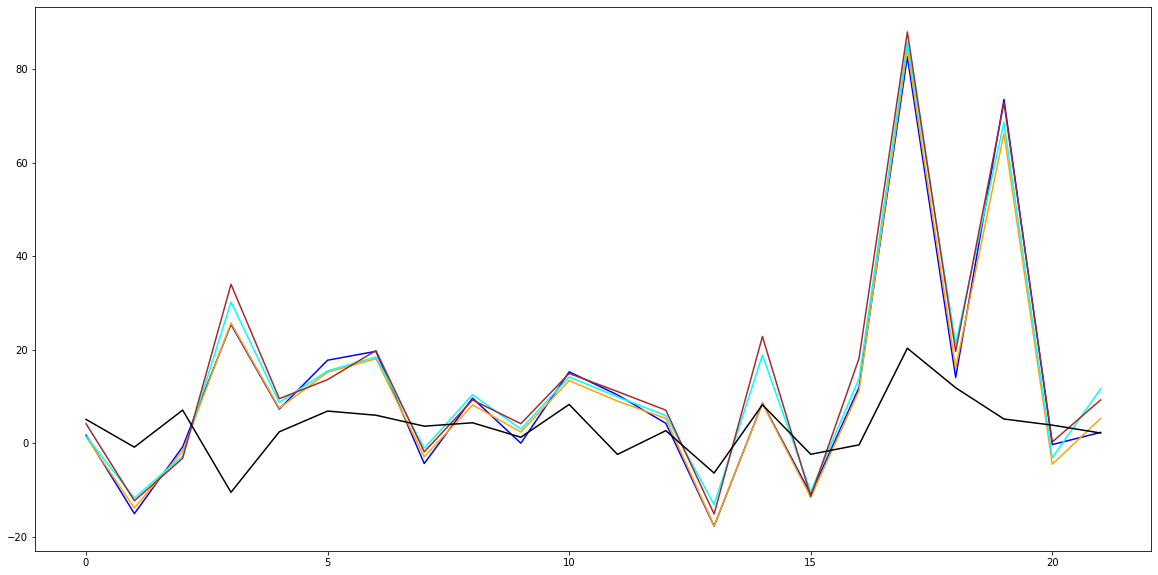

In [94]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(data0, axis = 0), "blue")
#plt.plot(np.mean(data4, axis = 0), "red")
plt.plot(np.mean(data_last, axis = 0), "orange")
plt.plot(np.mean(data[indx0], axis = 0), "cyan")
plt.plot(np.mean(data[indx_last], axis = 0), "brown")

plt.plot(sp500.loc[pred_dates]["return_40"].values, "black")

In [97]:
results[0][1]

['2015-05-28',
 array(['ADX_1_11', 'APO_10_40', 'Accounts & Notes Receivable/Revenue',
        'Accounts & Notes Receivable/Revenue_QC', 'Close',
        'Enterprise Value/EBITDA_QC',
        'Enterprise Value/Share Capital & Additional Paid-In Capital',
        'OBV_80', 'Operating Income (Loss)/Interest Expense, Net_QC',
        'Return on Assets_YC', 'Total Assets/Total Liabilities_YC',
        'close_0/Close_10', 'close_0/Close_40', 'close_160/Close_360',
        'close_40/Close_120'], dtype='<U62'),
 8424,
 1660,
 [(-14.850822273468065, 0.30405405405405406),
  (-14.082876334605526, 0.3624161073825503),
  (-14.383994611276842, 0.33766233766233766),
  (-13.78860141890437, 0.3401360544217687),
  (-12.822074210114799, 0.3597122302158273),
  (-13.266868235446974, 0.3333333333333333),
  (-14.177908300180867, 0.2781456953642384),
  (-13.774598473593432, 0.26973684210526316),
  (-14.085660886314166, 0.26143790849673204),
  (-13.963563590622782, 0.2631578947368421),
  (-12.788321841647713,

In [98]:
chosen_cols = []
for i in indx0:
    chosen_cols.append(results[i][0][1])

In [101]:
unique_cols = np.array([])
for i in chosen_cols:
    unique_cols = np.append(unique_cols, i)
    
print(len(unique_cols))

unique_cols = np.unique(unique_cols)
print(len(unique_cols))

152
47


In [103]:
with open("Training_second_dataset_col_search/chosen_cols", "wb") as f:
    pickle.dump(chosen_cols, f)


In [105]:
with open("Training_second_dataset_col_search/chosen_cols", "rb") as f:
    chosen_cols_test = pickle.load(f)